## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
alldata = pd.merge(mouse_metadata,study_results,on="Mouse ID", how="inner")
alldata.sample(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1664,w151,Ceftamin,Male,24,25,15,47.242929,1
463,a203,Infubinol,Female,20,23,45,67.973419,2
1389,q119,Ketapril,Male,17,30,5,47.864440,0
1026,k210,Ceftamin,Male,15,28,10,49.379932,0
1071,k804,Infubinol,Female,23,29,10,49.471244,0
1631,v719,Infubinol,Female,17,30,15,52.609108,1
464,a251,Infubinol,Female,21,25,0,45.000000,0
1313,o813,Infubinol,Male,24,28,0,45.000000,0
371,l509,Capomulin,Male,17,21,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0


## Summary statistics

In [3]:
#Create groupby based on drug
drug_groupby = alldata.groupby(["Drug Regimen"])
mean_by_drug = drug_groupby.mean()
mean_by_drug

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989
Propriva,10.894410,27.043478,16.863354,52.322552,0.975155
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928


In [4]:
#Start summary statistics DF for mean tumor volume by drug
summary_stats = pd.DataFrame(mean_by_drug["Tumor Volume (mm3)"])
summary_stats = summary_stats.rename(columns={"Tumor Volume (mm3)":"Mean"})

#Append median tumor volume by drug
median_by_drug = drug_groupby.median()
summary_stats["Median"] = median_by_drug["Tumor Volume (mm3)"]

#Append variance of tumor volume
var_by_drug = drug_groupby.var()
summary_stats["Variance"] = var_by_drug["Tumor Volume (mm3)"]

#Append std deviation
std_dev_by_drug = drug_groupby.std()
summary_stats["Std Deviation"] = std_dev_by_drug["Tumor Volume (mm3)"]

#Append SEM
sem_by_drug = drug_groupby.sem()
summary_stats["Std Error of Mean (SEM)"] = sem_by_drug["Tumor Volume (mm3)"]
summary_stats

,Mean,Median,Variance,Std Deviation,Std Error of Mean (SEM)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Create series for x-axis and y-axies
drugs = alldata["Drug Regimen"].unique()
drugs.sort()
datapts = drug_groupby.count()
datapts_x = datapts["Sex"]

In [6]:
drugs

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

In [7]:
datapts_x

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Sex, dtype: int64

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text xticklabel objects>)

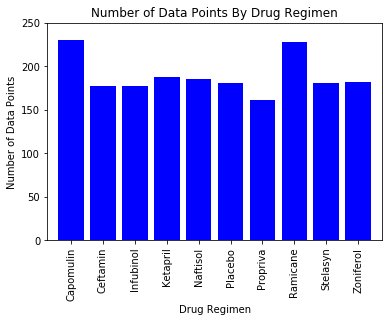

In [8]:
#Set up bar chart
plt.bar(drugs, datapts_x, color="b", align="center")
tick_locations = [value for value in drugs]
plt.xticks(tick_locations,drugs)
plt.xlim(-0.75,len(drugs)-0.25)
plt.ylim(0,max(datapts_x)+20)

#Create labels, rotate x-axis labels, sort drugs alphabetically
plt.title("Number of Data Points By Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation = 90)

In [9]:
#Clear plot
plt.show()

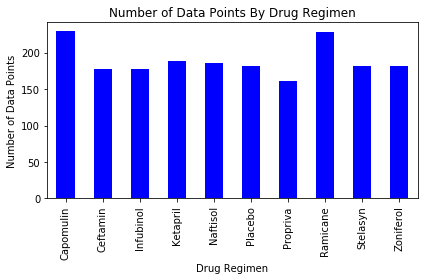

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
datapts_x.plot(kind="bar", facecolor="blue")

#Create labels, rotate x-axis labels, sort drugs alphabetically
plt.title("Number of Data Points By Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.tight_layout()

## Pie plots

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Create a groupby based on sex
sex_groupby = alldata.groupby(["Sex"])

# Determine percent of each sex
count_by_sex = sex_groupby.count()/datapts_x.sum()*100
count_by_sex

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,49.392499,49.392499,49.392499,49.392499,49.392499,49.392499,49.392499
Male,50.607501,50.607501,50.607501,50.607501,50.607501,50.607501,50.607501


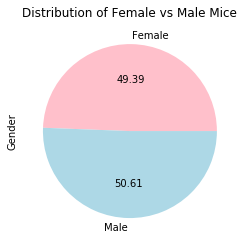

In [12]:
# Create pie plot using Pandas
gender_pie = count_by_sex["Mouse ID"].plot(kind="pie", y={"Female","Male"}, autopct='%.2f',
                                           colors=['pink','lightblue'],title = "Distribution of Female vs Male Mice")
gender_pie.set_ylabel("Gender")
plt.show()

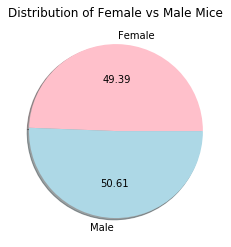

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Save gender counts as series
gender_count = sex_groupby.count()
gender_for_pie = gender_count["Mouse ID"]
gender_for_pie

labels = ["Female", "Male"]
colors = ["pink","lightblue"]
plt.pie(gender_for_pie, labels=labels, colors=colors,autopct="%.2f", shadow=True)
plt.title("Distribution of Female vs Male Mice")
plt.show()

## Quartiles, outliers and boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Create new DF for top 4 regimens
data_top4 = alldata.loc[(alldata["Drug Regimen"]=="Capomulin") | (alldata["Drug Regimen"]=="Ramicane") |
                        (alldata["Drug Regimen"]=="Infubinol") | (alldata["Drug Regimen"]=="Ceftamin"),:]

#Filter DF to only show rows for last timepoint
last_timept = data_top4.loc[data_top4["Timepoint"] == 45,:]

In [15]:
#Calculate average tumor volume per drug regimen
last_timept_group = last_timept.groupby(["Drug Regimen"])
last_timept_av_vol = last_timept_group.mean()
last_timept_av_vol

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,12.809524,19.857143,45.0,36.236114,1.476190
Ceftamin,13.538462,27.615385,45.0,64.132421,2.692308
Infubinol,18.555556,26.666667,45.0,65.755562,2.111111
Ramicane,10.050000,19.300000,45.0,34.955595,1.250000


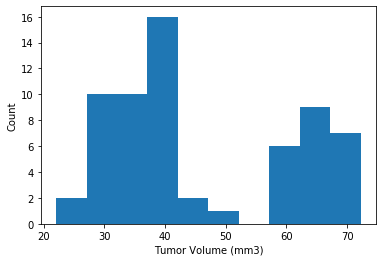

In [16]:
# Check if tumor volume data has a normal distribution
plt.hist(last_timept["Tumor Volume (mm3)"])
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Count")
plt.show()

In [32]:
# Create DFs for final tumor volume for each of the top 4 drug regimens
final_vol_cap = last_timept.loc[(last_timept["Drug Regimen"] == "Capomulin")]
final_vol_cef = last_timept.loc[(last_timept["Drug Regimen"] == "Ceftamin")]
final_vol_inf = last_timept.loc[(last_timept["Drug Regimen"] == "Infubinol")]
final_vol_ram = last_timept.loc[(last_timept["Drug Regimen"] == "Ramicane")]
final_vol_cap

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
134,r554,Capomulin,Female,8,17,45,32.377357,3
144,m957,Capomulin,Female,3,19,45,33.329098,1
164,t565,Capomulin,Female,20,17,45,34.455298,0
204,i738,Capomulin,Female,23,20,45,37.311846,2
224,w914,Capomulin,Male,24,21,45,36.041047,2


In [29]:
#Perform IQR and quartile calculations for Capomulin
quartiles_cap = final_vol_cap.quantile([0.25, 0.5, 0.75])
quartiles_cap

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0.25,7.0,17.0,45.0,32.377357,1.0
0.50,16.0,20.0,45.0,37.311846,1.0
0.75,19.0,22.0,45.0,40.159220,2.0


In [37]:
lowerq_cap = quartiles_cap.iloc[0,3]
upperq_cap = quartiles_cap.iloc[2,3] 
iqr_cap = upperq_cap - lowerq_cap

print(f"The lower quartile of Capomulin tumor volume is: {lowerq_cap}")
print(f"The upper quartile of Capomulin tumor volume is: {upperq_cap}")
print(f"The interquartile range of Capomulin tumor volume is: {iqr_cap}")

lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)
print(f"Values below {lower_bound_cap} could be outliers.")
print(f"Values above {upper_bound_cap} could be outliers.")

The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [ ]:
#Perform IQR and quartile calculations for Ceftamin
quartiles_cef = final_vol_cef.quantile([0.25, 0.5, 0.75])
lowerq_cef = quartiles[0.25]
upperq_cef = quartiles[0.75] 
iqr_cef = upperq_cef - lowerq_cef

print(f"The lower quartile of Capomulin tumor volume is: {lowerq_cef}")
print(f"The upper quartile of Capomulin tumor volume is: {upperq_cef}")
print(f"The interquartile range of Capomulin tumor volume is: {iqr_cef}")

lower_bound_cap = lowerq_cef - (1.5*iqr_cef)
upper_bound_cap = upperq_cef + (1.5*iqr_cef)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1,ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume for Top 4 Drug Regimens")
ax1.set_label("Final Tumor Vol (mm3)")
ax1.boxplot(final_vol)

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen